In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
CHANNEL = "3Mu"
MASS_POINTs = ["MHc70_MA15", "MHc70_MA40", "MHc70_MA65",
               "MHc100_MA15", "MHc100_MA25", "MHc100_MA60", "MHc100_MA95",
               "MHc130_MA15", "MHc130_MA45", "MHc130_MA55", "MHc130_MA90", "MHc130_MA125",
               "MHc160_MA15", "MHc160_MA45", "MHc160_MA75", "MHc160_MA85", "MHc160_MA120", "MHc160_MA155"]
GRID = "1D"

if CHANNEL == "3Mu":
    MASS_POINTs.remove("MHc100_MA25")  # negative bkg

In [47]:
def get_expected_limits(channel, mass_points, grid):
    sample = {}
    for mass_point in mass_points: #MASS_POINTs:
        sample[mass_point] = []
        with open(f"{channel}_{mass_point}_{grid}.txt", "r") as f:
            while True:
                line = f.readline()
                is_limit = True if "Expected" in line else False

                if not line:
                    break
                if not is_limit:
                    continue
                xsec = 20. * float(line.split(" ")[-1])
                sample[mass_point].append(xsec)
    df = pd.DataFrame(sample, index=[0.025, 0.16, 0.5, 0.84, 0.975])
    return df

MHc70_MA15       4.830
MHc70_MA40       5.294
MHc70_MA65       7.348
MHc100_MA15      9.084
MHc100_MA60      6.280
MHc100_MA95     10.106
MHc130_MA15      4.234
MHc130_MA45      6.812
MHc130_MA55      5.990
MHc130_MA90     13.200
MHc130_MA125     4.522
MHc160_MA15      3.674
MHc160_MA45      7.090
MHc160_MA75      6.242
MHc160_MA85      7.134
MHc160_MA120     4.874
MHc160_MA155     5.328
Name: 0.975, dtype: float64


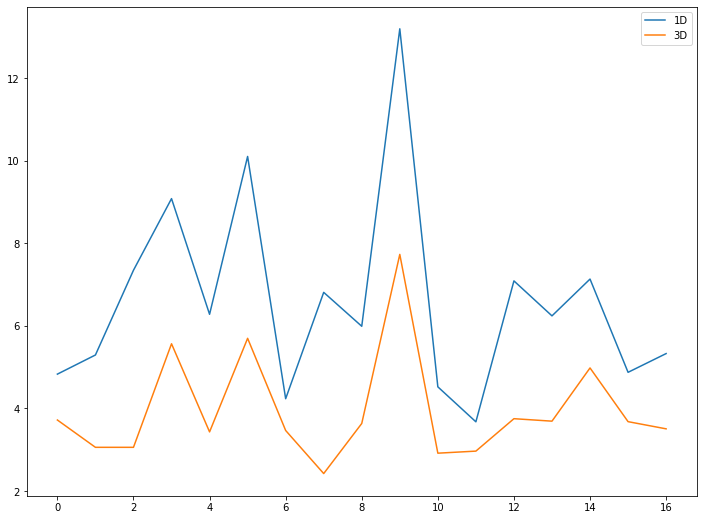

In [48]:
df_1D = get_expected_limits("3Mu", MASS_POINTs, "1D")
df_3D = get_expected_limits("3Mu", MASS_POINTs, "3D")

print(df_1D.loc[0.975])

plt.figure(figsize=(12, 9))
plt.plot(range(len(MASS_POINTs)), df_1D.loc[0.975], label="1D")
plt.plot(range(len(MASS_POINTs)), df_3D.loc[0.975], label="3D")
plt.legend(loc="best")
plt.show()